# Experiments

In this notebook we perform different ways to encode the concepts' features based on *Rank_PF*, *Disting*, and *Intercorr_str_tax*. 
This notebooks uses the MEN dataset... 

## Header

Libraries and additional programs

In [104]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

%matplotlib inline

pathh = '../Data/'

## SimLex-999 dataset

_SimLex-999 is a gold standard resource for the evaluation of models that learn the meaning of words and concepts. 
SimLex-999 provides a way of measuring how well models capture similarity, rather than relatedness or association. The scores in SimLex-999 therefore differ from other well-known evaluation datasets such as WordSim-353. Example:_

**coast - shore**   9.000 (SimLex-999 rating)    9.1 (WordSim-353 rating)

**clothes - closet**  1.96 (SimLex-999 rating)   9.1 (WordSim-353 rating)

_More information: https://fh295.github.io/simlex.html_

Just as with the previous dataset, first we find out how many pairs are there for which both concepts appear in the McRae dataset. 

In [105]:
def ListConcepts():
    "Read an excel file and returns a list of pairs of concepts with its similarity value (according to humans)"
    SimLex_path = "../Data/SimLex-999.txt"
    SimLex_file = open(SimLex_path, "r")
    SimLex = SimLex_file.readlines()
    SimLex = [str.split(x) for x in SimLex][1:]   # Removed first line (column's names)

    # List of all concepts in McRae dataset
    Concepts = get_concepts_list() 
    
    #We are interested in the first elements of each line (row)
    SimLexList = []
    for row in SimLex:
        if row[0] in Concepts and row[1] in Concepts and row[2] == 'N':
            SimLexList.append([row[0], row[1], float(row[3])])
    
    return sorted(SimLexList, key = lambda x: x[2])
            
def ListNames (PairConcepts):
    "Given the list of pairs of concepts. It returns a list of the concept names without repetition"
    L = set([])
    for x in PairConcepts:
        L.add(x[0])
        L.add(x[1])
    return sorted(list(L))


SimLexList = ListConcepts()

SimLex_sim = [x[2] for x in SimLexList]
SimLex_names = ListNames(SimLexList)
#for x in SimLexList: print x

### a) Visualizing dataset

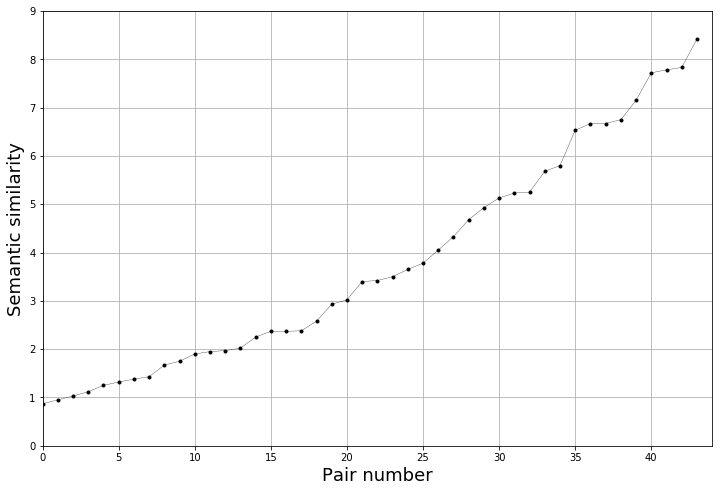

In [106]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot([x[2] for x in SimLexList], color='k', linestyle='-', marker='.', markersize=6, linewidth=.3 )  
plt.xlim((0,44))
plt.ylim((0,9))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('HumSim-SimLex.png', dpi=300)

### b) Encoding dataset

In [107]:
%run EncodingDataset.ipynb

Init_mem('normal', 100, SimLex_names)

Begining to encode dataset...
End of encoding


### b) Measuring similarity

In [108]:
# Create list of distances for each method
HD_SimLex = []; McRae_SimLex = []; WUP_SimLex = []; LCH_SimLex = []; RES_SimLex = []; JCN_SimLex = []

# Loop over all pairs of concepts
i = 0
print "Starting..."
for pair in SimLexList:
    print i,
    HD_SimLex.append(HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()))
    McRae_SimLex.append( McRae_simi(pair[0:2]) )
    WUP_SimLex.append(similarity_fun(wn.wup_similarity, pair[0:2]))
    LCH_SimLex.append(similarity_fun(wn.lch_similarity, pair[0:2]))
    RES_SimLex.append(similarity_fun(wn.res_similarity, pair[0:2], brown_ic))
    JCN_SimLex.append(similarity_fun(wn.jcn_similarity, pair[0:2], brown_ic))
    i += 1

#Max-min normalization to HD_sim...
max_sim = float(max(HD_SimLex)); min_sim = float(min(HD_SimLex))
HD_SimLex = map(lambda x: 1. - (float(x) - min_sim) / (max_sim - min_sim), HD_SimLex)
    
print "End"

Starting...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 End


### c) Computing correlation

In [109]:
Pear_correlations = [['HDC', pearsonr(SimLex_sim, HD_SimLex)[0]], ['McRae', pearsonr(SimLex_sim, McRae_SimLex)[0]],
                ['wup', pearsonr(SimLex_sim, WUP_SimLex)[0]], ['lch', pearsonr(SimLex_sim, LCH_SimLex)[0]],
                ['res', pearsonr(SimLex_sim, RES_SimLex)[0]], ['jcn', pearsonr(SimLex_sim, JCN_SimLex)[0]]]

Spear_correlations = [['HDC', spearmanr(SimLex_sim, HD_SimLex)[0]], ['McRae', spearmanr(SimLex_sim, McRae_SimLex)[0]],
                ['wup', spearmanr(SimLex_sim, WUP_SimLex)[0]], ['lch', spearmanr(SimLex_sim, LCH_SimLex)[0]],
                ['res', spearmanr(SimLex_sim, RES_SimLex)[0]], ['jcn', spearmanr(SimLex_sim, JCN_SimLex)[0]]]


print "Pearson's correlations: ", sorted(Pear_correlations, key = lambda x : x[1], reverse = True)
print "\nSpearman's correlations: ", sorted(Spear_correlations, key = lambda x : x[1], reverse = True)

Pearson's correlations:  [['HDC', 0.6607019375561832], ['McRae', 0.6249538446769186], ['res', 0.5148772163908228], ['lch', 0.43627661476892626], ['wup', 0.42406723211596103], ['jcn', 0.35782780233339617]]

Spearman's correlations:  [['HDC', 0.6485057795319988], ['McRae', 0.6236872269863861], ['res', 0.5229768623236039], ['wup', 0.4695487204069717], ['lch', 0.4410097351419255], ['jcn', 0.3981390142486437]]


### d) Plotting

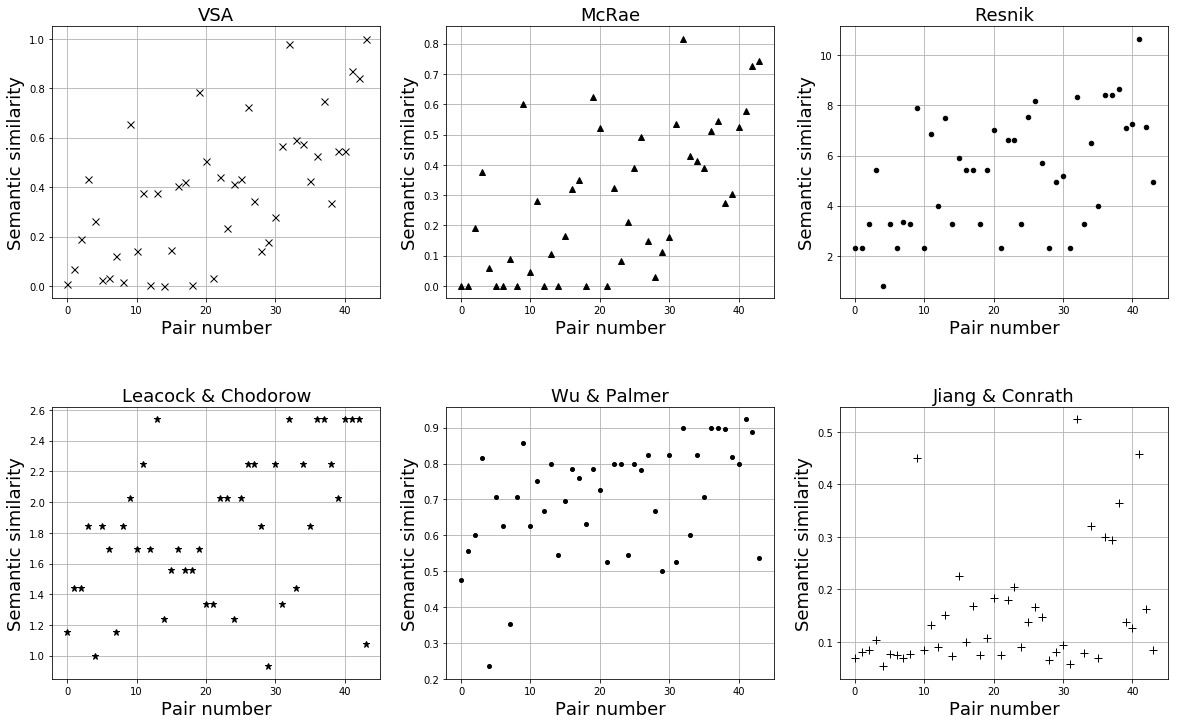

In [110]:
plt.rcParams["figure.figsize"] = [20,12]
f_size = 18
plt.subplots_adjust(hspace=0.4)

plt.subplot(231)
plt.plot(HD_SimLex, color='k', linestyle='None', marker='x', markersize=7, linewidth=1 )  
plt.title('VSA', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(232)
plt.plot(McRae_SimLex, color='k', linestyle='None', marker='^', markersize=6, linewidth=1 )  
plt.title('McRae', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)


plt.subplot(233)
plt.plot(RES_SimLex, color='k', linestyle='None', marker='.', markersize=9, linewidth=1 )  
plt.title('Resnik', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(234)
plt.plot(LCH_SimLex, color='k', linestyle='None', marker='*', markersize=7, linewidth=1 )  
plt.title('Leacock & Chodorow', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(235)
plt.plot(WUP_SimLex, color='k', linestyle='None', marker='.', markersize=8, linewidth=1 )  
plt.title('Wu & Palmer', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(236)
plt.plot(JCN_SimLex, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('Jiang & Conrath', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.savefig('SubPlots-SimLex.png') #, dpi=1000)

In [111]:
# Argumento importante en discusión...
print '  i',' c1','    c2   ','SimLex-999','VSA', 'Dif'
L = []
for i in range(len(SimLexList)):
    L.append([i] + SimLexList[i] + [round(HD_SimLex[i],2)] + [abs(round((SimLexList[i][2]-.9)/7.4 - HD_SimLex[i],2))])

# Para ver parejas que menos concuerda...
#L = sorted(L, key = lambda x: x[5], reverse = True)
L = sorted(L, key = lambda x: x[5], reverse = True)
for x in L:
    print x

  i  c1     c2    SimLex-999 VSA Dif
[9, 'dog', 'cat', 1.75, 0.66, 0.54]
[19, 'cow', 'goat', 2.93, 0.79, 0.51]
[38, 'cat', 'lion', 6.75, 0.33, 0.46]
[3, 'mouse', 'cat', 1.12, 0.43, 0.4]
[32, 'door', 'gate', 5.25, 0.98, 0.39]
[28, 'wall', 'brick', 4.68, 0.14, 0.37]
[29, 'calf', 'bull', 4.93, 0.18, 0.37]
[40, 'cottage', 'cabin', 7.72, 0.55, 0.37]
[35, 'cabin', 'hut', 6.53, 0.42, 0.34]
[21, 'bed', 'bedroom', 3.4, 0.03, 0.31]
[26, 'apple', 'lemon', 4.05, 0.72, 0.3]
[39, 'sweater', 'jacket', 7.15, 0.55, 0.3]
[30, 'cup', 'jar', 5.13, 0.28, 0.29]
[36, 'chair', 'bench', 6.67, 0.53, 0.25]
[11, 'bread', 'cheese', 1.95, 0.38, 0.24]
[4, 'box', 'cigar', 1.25, 0.26, 0.22]
[13, 'spoon', 'cup', 2.02, 0.38, 0.22]
[17, 'dog', 'horse', 2.38, 0.42, 0.22]
[18, 'ball', 'cannon', 2.58, 0.0, 0.22]
[20, 'horse', 'ox', 3.02, 0.51, 0.22]
[16, 'cat', 'rabbit', 2.37, 0.4, 0.21]
[14, 'boat', 'anchor', 2.25, 0.0, 0.18]
[2, 'car', 'elevator', 1.03, 0.19, 0.17]
[12, 'door', 'cellar', 1.97, 0.0, 0.14]
[23, 'bed', 'chai

## Parameters for tests

In [115]:
num_f = 30
reps = 10

### Normal...

In [116]:
%run EncodingDataset.ipynb

mode = 'normal'
norm_corr = []

for i in range(reps):
    # Printing current mode
    print i,
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()))
        
    # Min-max Normalization...
    max_sim = float(max(HD_SimLex)); min_sim = float(min(HD_SimLex))
    HD_SimLex = map(lambda x: 1. - (float(x) - min_sim) / (max_sim - min_sim), HD_SimLex)
    
    corr = spearmanr(SimLex_sim, HD_SimLex)[0]
    print corr
    norm_corr.append(corr)
    
print "\nSpearman's correlation value: ", norm_corr
print "Mean value", sum(norm_corr) / len(norm_corr)

0 Begining to encode dataset...
End of encoding
0.6620854921826085
1 Begining to encode dataset...
End of encoding
0.6365494412876938
2 Begining to encode dataset...
End of encoding
0.6572697176095031
3 Begining to encode dataset...
End of encoding
0.6460161402326793
4 Begining to encode dataset...
End of encoding
0.6626964566461675
5 Begining to encode dataset...
End of encoding
0.6593367872438047
6 Begining to encode dataset...
End of encoding
0.6343646502469589
7 Begining to encode dataset...
End of encoding
0.6460161402326793
8 Begining to encode dataset...
End of encoding
0.6375555101480023
9 Begining to encode dataset...
End of encoding
0.6445838341471709

Spearman's correlation value:  [0.6620854921826085, 0.6365494412876938, 0.6572697176095031, 0.6460161402326793, 0.6626964566461675, 0.6593367872438047, 0.6343646502469589, 0.6460161402326793, 0.6375555101480023, 0.6445838341471709]
Mean value 0.6486474169977268


## Exploring some characteristics of the SimLex dataset

List of names and a list of how many features are there for each concept

In [117]:
#print MEN_names
#print Dict_defs[MEN_names[0]]
L = []
for n in SimLex_names:
    L.append(len(Dict_defs[n]))

print L
print max(L), min(L), sum(L)/len(L)

[14, 18, 19, 9, 17, 9, 17, 10, 11, 10, 15, 14, 14, 16, 9, 14, 12, 10, 14, 17, 16, 17, 20, 10, 16, 19, 20, 11, 13, 20, 22, 21, 18, 13, 13, 14, 14, 20, 11, 16, 19, 16, 16, 6, 15, 12, 12, 17, 16, 17, 20, 19, 11, 20, 14, 22, 10, 21, 18, 19, 11, 14]
22 6 15


## Distribution of Prod_Freq values in MEN

Since we are going to weight features based on the Prod_Freq value we have to have an idea of how the prod_freq values are distributed

In [118]:
df = pd.read_excel( pathh + 'CONCS_FEATS_concstats_brm.xlsx')

# Extracting only relevant columns (from concepts in MEN)
NewDF = df[df['Concept'].isin(SimLex_names)]
Newnew= NewDF[['Concept','Feature','Prod_Freq']]
#Newnew

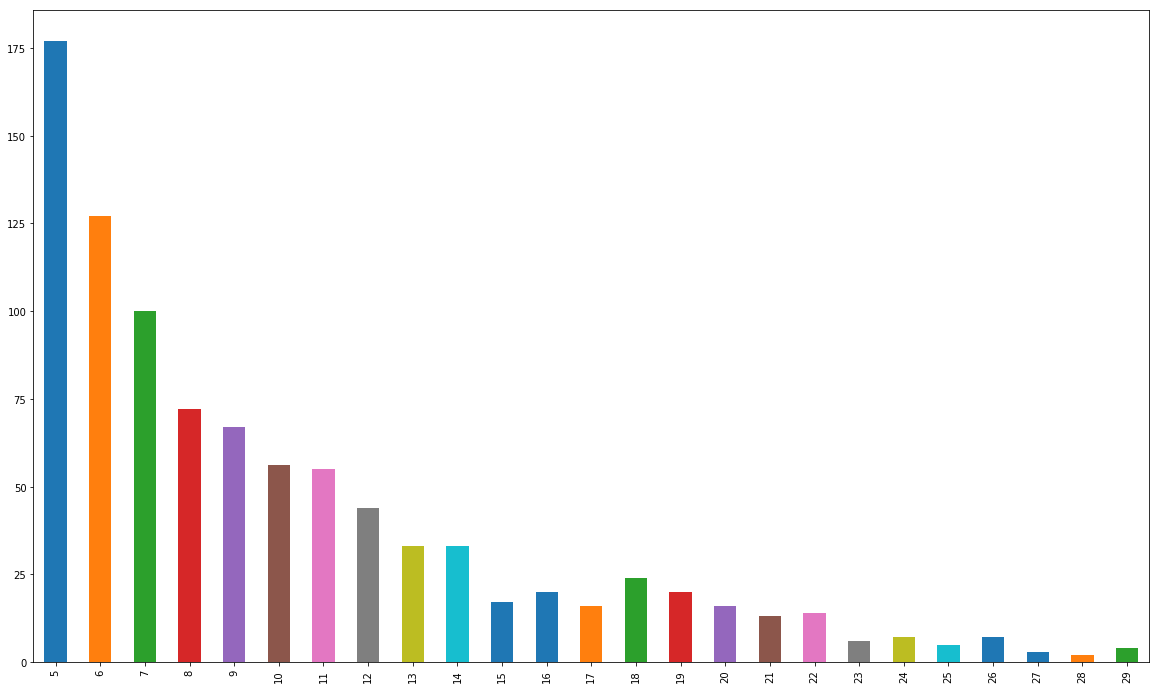

In [119]:
# Plotting distribution (x-axis is the Production Frequency value)
Freq = Newnew['Prod_Freq'].value_counts().sort_index()
#print Freq.sort_values()
Freq.plot('bar')

From the previous analysis I decided to weight each feature according to the following rules:

|Prod_Freq| Weight |
| ----- | ----- |
|28-30|5|
|21-27|4|
|15-20|3|
|10-14|2|
|5-9|1|

## Testing weighted HDC representations

Here we find the correlation between the similarity values obtained from the HDC weighted representations and the dataset.

In [120]:
%run EncodingDataset.ipynb

mode = 'Prod_Freq'
norm_corr = []

for i in range(reps):
    # Printing current mode
    print i,
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()))
        
    # Min-max Normalization...
    max_sim = float(max(HD_SimLex)); min_sim = float(min(HD_SimLex))
    HD_SimLex = map(lambda x: 1. - (float(x) - min_sim) / (max_sim - min_sim), HD_SimLex)
    
    corr = spearmanr(SimLex_sim, HD_SimLex)[0]
    print corr
    norm_corr.append(corr)
    
print "\nSpearman's correlation value: ", norm_corr
print "Mean value", sum(norm_corr) / len(norm_corr)

0 Begining to encode dataset...
End of encoding
0.6508562987479908
1 Begining to encode dataset...
End of encoding
0.655389928870138
2 Begining to encode dataset...
End of encoding
0.6656799524871979
3 Begining to encode dataset...
End of encoding
0.63852280093739
4 Begining to encode dataset...
End of encoding
0.6440904942347468
5 Begining to encode dataset...
End of encoding
0.6529231423865962
6 Begining to encode dataset...
End of encoding
0.6695327382897577
7 Begining to encode dataset...
End of encoding
0.6637536136013619
8 Begining to encode dataset...
End of encoding
0.6657974503814043
9 Begining to encode dataset...
End of encoding
0.6575043172846025

Spearman's correlation value:  [0.6508562987479908, 0.655389928870138, 0.6656799524871979, 0.63852280093739, 0.6440904942347468, 0.6529231423865962, 0.6695327382897577, 0.6637536136013619, 0.6657974503814043, 0.6575043172846025]
Mean value 0.6564050737221186


## Distribution of Inter_corr_tax values in MEN

Since we are going to weight features based on the Inter_corr_str_tax value we have to have an idea of how the values are distributed

In [121]:
df = pd.read_excel( pathh + 'CONCS_FEATS_concstats_brm.xlsx')

# Extracting only relevant columns (from concepts in MEN)
NewDF = df[df['Concept'].isin(SimLex_names)]
Newnew= NewDF[['Concept','Feature','Intercorr_Str_Tax']]
#Newnew

In [122]:
# Plotting distribution (x-axis is the Production Frequency value)
Newnew = Newnew.round()
Intercorr = Newnew['Intercorr_Str_Tax'].value_counts().sort_index()
print Intercorr

0.0      505
7.0       11
8.0       10
9.0       10
10.0       6
11.0      12
12.0       6
13.0       5
14.0      10
15.0       2
16.0      10
17.0       4
18.0       8
19.0       2
20.0       2
21.0       4
22.0       4
23.0       8
24.0       3
25.0       1
26.0       5
27.0       3
28.0       2
29.0       2
30.0       5
31.0       4
32.0       3
33.0       2
34.0       1
35.0       4
        ... 
164.0      2
167.0      1
171.0      1
172.0      1
176.0      3
180.0      2
184.0      2
186.0      1
187.0      1
188.0      1
191.0      1
197.0      1
202.0      1
207.0      2
210.0      2
213.0      1
216.0      1
231.0      3
235.0      1
240.0      1
249.0      1
259.0      1
266.0      1
283.0      1
285.0      1
290.0      1
296.0      1
297.0      1
319.0      1
320.0      1
Name: Intercorr_Str_Tax, Length: 164, dtype: int64


In [123]:
%run EncodingDataset.ipynb

mode = 'Intercorr_str_tax'
norm_corr = []

for i in range(reps):
    # Printing current mode
    print i,
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()))
        
    # Min-max Normalization...
    max_sim = float(max(HD_SimLex)); min_sim = float(min(HD_SimLex))
    HD_SimLex = map(lambda x: 1. - (float(x) - min_sim) / (max_sim - min_sim), HD_SimLex)
    
    corr = spearmanr(SimLex_sim, HD_SimLex)[0]
    print corr
    norm_corr.append(corr)
    
print "\nSpearman's correlation value: ", norm_corr
print "Mean value", sum(norm_corr) / len(norm_corr)

0 Begining to encode dataset...
End of encoding
0.6224540152184358
1 Begining to encode dataset...
End of encoding
0.6184368187886973
2 Begining to encode dataset...
End of encoding
0.6037070985463227
3 Begining to encode dataset...
End of encoding
0.6082881120188315
4 Begining to encode dataset...
End of encoding
0.5944041173406123
5 Begining to encode dataset...
End of encoding
0.5894002410860256
6 Begining to encode dataset...
End of encoding
0.6233217045840951
7 Begining to encode dataset...
End of encoding
0.6094862232347183
8 Begining to encode dataset...
End of encoding
0.6032137586338986
9 Begining to encode dataset...
End of encoding
0.6061951584269337

Spearman's correlation value:  [0.6224540152184358, 0.6184368187886973, 0.6037070985463227, 0.6082881120188315, 0.5944041173406123, 0.5894002410860256, 0.6233217045840951, 0.6094862232347183, 0.6032137586338986, 0.6061951584269337]
Mean value 0.607890724787857


## No_Tax....

In [124]:
%run EncodingDataset.ipynb

mode = 'Intercorr_str_No_tax'
norm_corr = []

for i in range(reps):
    # Printing current mode
    print i,
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()))
        
    # Min-max Normalization...
    max_sim = float(max(HD_SimLex)); min_sim = float(min(HD_SimLex))
    HD_SimLex = map(lambda x: 1. - (float(x) - min_sim) / (max_sim - min_sim), HD_SimLex)
    
    corr = spearmanr(SimLex_sim, HD_SimLex)[0]
    print corr
    norm_corr.append(corr)
    
print "\nSpearman's correlation value: ", norm_corr
print "Mean value", sum(norm_corr) / len(norm_corr)

0 Begining to encode dataset...
End of encoding
0.631475087902761
1 Begining to encode dataset...
End of encoding
0.6285371960064404
2 Begining to encode dataset...
End of encoding
0.6247797605198634
3 Begining to encode dataset...
End of encoding
0.6209606375212765
4 Begining to encode dataset...
End of encoding
0.6261893031267892
5 Begining to encode dataset...
End of encoding
0.6516315471817999
6 Begining to encode dataset...
End of encoding
0.650244917061608
7 Begining to encode dataset...
End of encoding
0.6253832904235266
8 Begining to encode dataset...
End of encoding
0.6099090860167962
9 Begining to encode dataset...
End of encoding
0.6158996420962308

Spearman's correlation value:  [0.631475087902761, 0.6285371960064404, 0.6247797605198634, 0.6209606375212765, 0.6261893031267892, 0.6516315471817999, 0.650244917061608, 0.6253832904235266, 0.6099090860167962, 0.6158996420962308]
Mean value 0.6285010467857093


## Combining methods...

In [125]:
%run EncodingDataset.ipynb

mode = 'Intercorr_PF'
norm_corr = []

for i in range(reps):
    # Printing current mode
    print i,
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()))
        
    # Min-max Normalization...
    max_sim = float(max(HD_SimLex)); min_sim = float(min(HD_SimLex))
    HD_SimLex = map(lambda x: 1. - (float(x) - min_sim) / (max_sim - min_sim), HD_SimLex)
    
    corr = spearmanr(SimLex_sim, HD_SimLex)[0]
    print corr
    norm_corr.append(corr)
    
print "\nSpearman's correlation value: ", norm_corr
print "Mean value", sum(norm_corr) / len(norm_corr)

0 Begining to encode dataset...
End of encoding
0.6278807542551001
1 Begining to encode dataset...
End of encoding
0.6451703848668935
2 Begining to encode dataset...
End of encoding
0.6423285659760897
3 Begining to encode dataset...
End of encoding
0.6507382743583163
4 Begining to encode dataset...
End of encoding
0.6328141533793404
5 Begining to encode dataset...
End of encoding
0.6513496386604147
6 Begining to encode dataset...
End of encoding
0.633752687428786
7 Begining to encode dataset...
End of encoding
0.6262113687505297
8 Begining to encode dataset...
End of encoding
0.6307442909500987
9 Begining to encode dataset...
End of encoding
0.628796956949602

Spearman's correlation value:  [0.6278807542551001, 0.6451703848668935, 0.6423285659760897, 0.6507382743583163, 0.6328141533793404, 0.6513496386604147, 0.633752687428786, 0.6262113687505297, 0.6307442909500987, 0.628796956949602]
Mean value 0.6369787075575171


### Combining with Intercorr_No_Tax... 

In [126]:
%run EncodingDataset.ipynb

mode = 'Intercorr_NoT_PF'
norm_corr = []

for i in range(reps):
    # Printing current mode
    print i,
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()))
        
    # Min-max Normalization...
    max_sim = float(max(HD_SimLex)); min_sim = float(min(HD_SimLex))
    HD_SimLex = map(lambda x: 1. - (float(x) - min_sim) / (max_sim - min_sim), HD_SimLex)
    
    corr = spearmanr(SimLex_sim, HD_SimLex)[0]
    print corr
    norm_corr.append(corr)
    
print "\nSpearman's correlation value: ", norm_corr
print "Mean value", sum(norm_corr) / len(norm_corr)

0 Begining to encode dataset...
End of encoding
0.6708718037663373
1 Begining to encode dataset...
End of encoding
0.6505743902266056
2 Begining to encode dataset...
End of encoding
0.6376995458024527
3 Begining to encode dataset...
End of encoding
0.686894316245657
4 Begining to encode dataset...
End of encoding
0.6566585619188166
5 Begining to encode dataset...
End of encoding
0.6636831364710157
6 Begining to encode dataset...
End of encoding
0.6534639525708035
7 Begining to encode dataset...
End of encoding
0.6486010305769095
8 Begining to encode dataset...
End of encoding
0.6457342217774173
9 Begining to encode dataset...
End of encoding
0.6431742915402452

Spearman's correlation value:  [0.6708718037663373, 0.6505743902266056, 0.6376995458024527, 0.686894316245657, 0.6566585619188166, 0.6636831364710157, 0.6534639525708035, 0.6486010305769095, 0.6457342217774173, 0.6431742915402452]
Mean value 0.6557355250896261
